<a href="https://colab.research.google.com/github/mkkkkkkkkkkkkkkkkkkkk/POSI-MON1/blob/main/Tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 7

## Introduction

### Data Scaling

Data scaling is the process of transforming feature values so that they fall within a similar range.  
The goal is to improve the performance of learning algorithms (e.g., linear regression, k-NN, SVM), which are sensitive to differences in data scale.

<br>

Scaling **does not change the shape of the data distribution**, but it ensures feature comparability, which **speeds up and stabilizes** the model training process.


#### The most common scaling methods

##### **Standardization (Z-score Normalization)**

Transforms the data so that it has a **mean of 0** and a **standard deviation of 1**:

$$
x' = \frac{x - \mu}{\sigma}
$$

where:  
- $ x $ – original value,  
- $ \mu $ – mean of the feature values,  
- $ \sigma $ – standard deviation.


##### **Normalization (Min-Max Scaling)**

Transforms the data into a specified range (usually $ [0, 1] $):

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

where:  
- $ x_{\min} $, $ x_{\max} $ – minimum and maximum values of the feature.


##### **MaxAbs Scaling**

Used for data containing negative values; scales the data to the range $ [-1, 1] $:

$$
x' = \frac{x}{|x_{\max}|}
$$


#### Example of Data Scaling in Python

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = {
    'Height': [160, 170, 180, 190],
    'Weight': [55, 65, 80, 95]
}

df = pd.DataFrame(data)
print(df)

# Standardization (mean = 0, std deviation = 1)
scaler_std = StandardScaler()
df_standard = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

print("\nData after standardization:")
print(df_standard)

# Normalization (range [0, 1])
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

print("\nData after normalization:")
print(df_minmax)


   Height  Weight
0     160      55
1     170      65
2     180      80
3     190      95

Data after standardization:
     Height    Weight
0 -1.341641 -1.237179
1 -0.447214 -0.577350
2  0.447214  0.412393
3  1.341641  1.402136

Data after normalization:
     Height  Weight
0  0.000000   0.000
1  0.333333   0.250
2  0.666667   0.625
3  1.000000   1.000


### Nueral network

#### What is a Neural Network?
A **neural network** is a mathematical model inspired by the way the biological brain works,  
used for pattern recognition and data processing. It consists of layers of interconnected  
**neurons** (nodes) that transform input data into output data.

A neural network is made up of connected “neurons” (simple computational units) arranged in layers:

- Input layer – receives data (e.g., image pixels, numbers, text).

- Hidden layers – process the data, learning complex relationships and patterns.

- Output layer – produces the result (e.g., class label, predicted value, text response).


#### Activation Functions (Examples)

- Sigmoid function:
  $$
  f(x) = \frac{1}{1 + e^{-x}}
  $$

**Range:** $(0, 1)$

**Advantages:**  
Can be interpreted as a “probability.”

**Disadvantages:**  
Performs poorly with large positive/negative values (vanishing gradient problem).

**Usage:**  
Often used in the output layer for binary classification.

<br>

- ReLU function:
  $$
  f(x) = \max(0, x)
  $$

**Range:** $[0, ∞)$

**Advantages:**  
Fast, simple, and highly effective.  
Helps avoid the vanishing gradient problem.

**Disadvantages:**  
Can cause so-called dead neurons (when weights make the neuron always output 0).

**Usage:**  
Most commonly used in hidden layers of deep networks (CNN, MLP).

<br>

- Softmax

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

**Range:** $(0, 1)$, and the sum of all outputs = $1$

**Description:**  
Converts a vector of values into a probability distribution.

**Usage:**  
Used in the output layer for multi-class classification (e.g., recognizing digits 0–9).


#### Training a Neural Network

Training involves minimizing the error between the predicted and actual output using the  
**backpropagation** algorithm and optimization methods, e.g., **gradient descent**.

$$
w_i \leftarrow w_i - \eta \frac{\partial L}{\partial w_i}
$$

where:  
- $ \eta $ – learning rate,  
- $ L $ – loss function.

#### How a Neural Network Learns to Solve Tasks

The process of training a neural network can be divided into several steps:

#### a) Forward Propagation

- Input data passes through the network.  
- Each neuron computes its weighted sum and applies an activation function.  
- The output (prediction) is obtained.  

#### b) Error Calculation

- Compare the network's output with the actual response (label).  
- Use a loss function, e.g., MSE for regression or cross-entropy for classification.  

#### c) Backpropagation

- Compute gradients of the loss function with respect to the weights.  
- Weights are updated to minimize the error (e.g., using gradient descent or an optimizer like Adam).  

#### d) Weight Update

Weights are updated according to the rule:

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial L}{\partial w}
$$

where:  

- $\eta$ — learning rate,  
- $L$ — loss function.  

#### Example of Multi-Class Classification Using a Neural Network in Python

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, activation='relu', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
Confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Example of Multi-Class Classification in Python (Keras)


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

iris = load_iris()
X = iris.data
y = iris.target

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build MLP model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  # hidden layer 1
model.add(Dense(8, activation='relu'))                     # hidden layer 2
model.add(Dense(3, activation='softmax'))                 # output layer (3 classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=5,
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2712 - loss: 1.3881 - val_accuracy: 0.3750 - val_loss: 1.1759
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3153 - loss: 1.1816 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2149 - loss: 1.1158 - val_accuracy: 0.2917 - val_loss: 1.0381
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2929 - loss: 1.0031 - val_accuracy: 0.5417 - val_loss: 0.9911
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 0.9713 - val_accuracy: 0.5833 - val_loss: 0.9487
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8139 - loss: 0.8906 - val_accuracy: 0.6250 - val_loss: 0.9079
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7474 - loss: 0.8705 - val_accuracy: 0.6250 - val_loss: 0.8690
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7879 - loss: 0.7717 - val_accuracy: 0.7083 - 

## Exercise
For the `load_digits` dataset from the `sklearn.datasets` module, perform EDA (Exploratory Data Analysis) and classify the `target` feature (digits 0-9) using a neural network.

Example of loading data:
```
import pandas as pd
from sklearn.datasets import load_digits

data = load_digits()

X = digits.data       # features (64 piksele)
y = digits.target     # labels (cyfry 0-9)
```


Remember to:
- check for missing data,
- check for correlation between features,
- identify outliers,
- validate the model using metrics,
- visualize the data and results.


=== BASIC INFO ===
Shape of data: (1797, 65)

Head of data:
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

=== MISSING VALUES ===
No missing values in dataset.

=== DESCRIPTIVE STATISTICS (FEATURES ONLY) ===
           0            1            2            3            4   \
count  

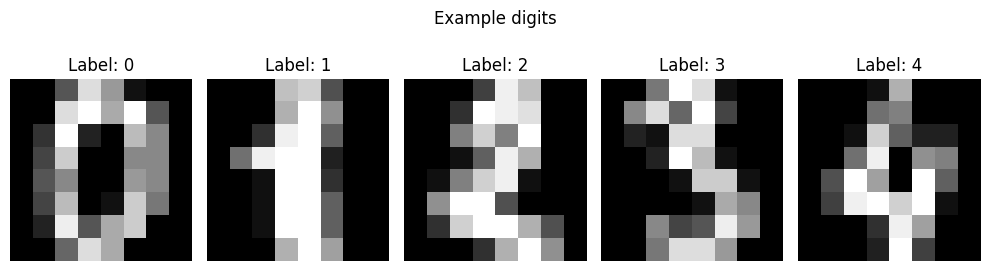

Plotting correlation matrix (this may be dense)...


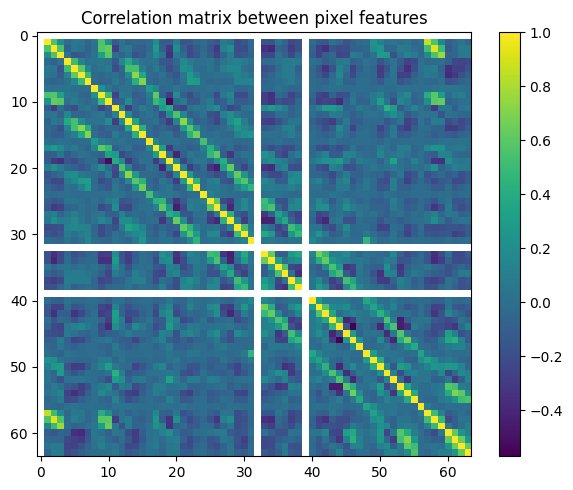


=== OUTLIER DETECTION (|z| > 3) ===
Number of potential outlier samples: 435
First 10 indices of outliers: [  7  15  33  66  77  84  87  91 103 107]

Training neural network...

=== MODEL PERFORMANCE ===
Accuracy: 0.9694

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      0.89      0.91        36
           2       0.97      1.00      0.99        35
           3       0.95      0.97      0.96        37
           4       0.97      0.97      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.94      0.89      0.91        35
           9       0.97      0.97      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       

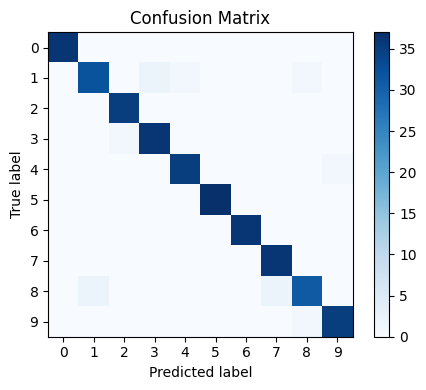

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
digits = load_digits()
X = digits.data
y = digits.target
df = pd.DataFrame(X)
df['target'] = y

print("=== BASIC INFO ===")
print("Shape of data:", df.shape)
print("\nHead of data:")
print(df.head())

print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
if (missing > 0).any():
    print(missing[missing > 0])
else:
    print("No missing values in dataset.")

print("\n=== DESCRIPTIVE STATISTICS (FEATURES ONLY) ===")
print(df.drop('target', axis=1).describe())

print("\nShowing example images...")
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Example digits")
plt.tight_layout()
plt.show()

print("Plotting correlation matrix (this may be dense)...")
corr_matrix = df.drop('target', axis=1).corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, cmap='viridis', aspect='auto')
plt.title("Correlation matrix between pixel features")
plt.colorbar()
plt.tight_layout()
plt.show()

print("\n=== OUTLIER DETECTION (|z| > 3) ===")
scaler_outlier = StandardScaler()
X_scaled_for_outliers = scaler_outlier.fit_transform(X)

outlier_mask = np.abs(X_scaled_for_outliers) > 3
outlier_rows = np.where(outlier_mask.any(axis=1))[0]
print(f"Number of potential outlier samples: {len(outlier_rows)}")
print("First 10 indices of outliers:", outlier_rows[:10])


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)

print("\nTraining neural network...")
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\n=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
num_classes = len(np.unique(y))
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.colorbar()
plt.tight_layout()
plt.show()
